# Hands-on: Data Visualization with `matplotlib`

This hands-on will allow you to practice reading in and exploring data, as well as using basic visualization to easily see the distribution, patterns and trends and other interesting things that might arise from the dataset.

The main library to be used will be `matplotlib`. We'll cover the basic plotting functions first then proceed with exploring the dataset and applying the concepts from the lecture. 

`matplotlib can` be used in "interactive" mode through Jupyter notebooks. To activate this function, simply include the line `%matplotlib inline` in your notebook after importing `pyplot` from `matplotlib`.

<hr>

An alternate library for plotting with different styling is `seaborn`. But `seaborn` is built on top of `matplotlib` with prettier default styles and other "off-the-shelf" type visualizations. 

To know more about these two libraries and maximize their gallery samples, you can visit their documentation pages:
* [`matplotlib` Documentation](https://matplotlib.org/)
* [`seaborn` Documentation](https://seaborn.pydata.org/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Before we get into learning some stuff, lets set up the `style` of our plots. Starting from Matplotlib v1.5, you have many different plotting `styles` to chose from. To get all the list of supported ones, run 
```ipython
plt.style.available
```

Or check out the gallery [here](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html).

To be able to change the `style` that Matplotlib comes with for all of your plots, simply call

```ipython
plt.style.use('seaborn-whitegrid')
```

In [2]:
plt.style.use('seaborn-whitegrid')

## Parts of a Plot (in `matplotlib`)
Before we begin applying the visualization techniques, we first need to know how charts or **figures** are made in `matplotlib`.

### 01. Figures

All plotting are done through the `Figure` object. They serve as the _canvas_ of your plot. You can create as many figures as you need but a `Figure` is mandatory for any plotting to happen.

#### Figure Properties
- ##### figsize : 
tuple of integers, width, height in inches.   
- ##### dpi : 
integer, resolution of the figure in dots per inch.

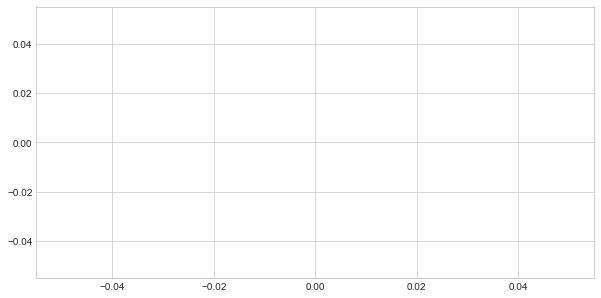

In [3]:
fig = plt.figure(figsize=(10, 5))

# To plot, we just call plot()
plt.plot()
plt.savefig('blankplot.png')

You may also save the figure generated using the function `plt.savefig(<file_name>)`. The default format saved is `png`. There are many other formats supported. To get a list of all the formats, you can use this function: `fig.canvas.get_supported_filetypes()`

### 02. Axes

We can see from above that `matplotlib` automatically creates the axes for us in a figure. An `Axes` object contains [`Axis`](http://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis) objects (and many other things) and it belongs to just one `Figure`. 

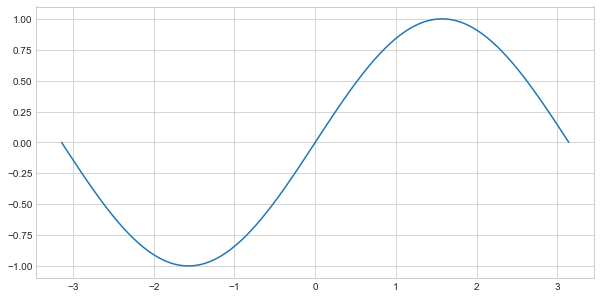

In [4]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

theta = np.linspace(-np.pi, np.pi, 100)
plt.plot(theta, np.sin(theta))

```ipython
fig.add_subplot(numrows numcols fignum)
```
> `fignum` ranges from 1 to numrows*numcols.

> Each figure can have as many axes and subplots as needed. See the [`Figure` class documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.figure.Figure.html) for more details.

If you want to place an axes manually, i.e., not on a rectangular grid, use the [`axes()` command](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axes.html).

### 03. Limits and Autoscaling

Looking at the plot above, we see that the axes only show the values from the data. By default, `matplotlib` will attempt to determine limits that encompasses all the data provided.  This is the **autoscale** feature. 

To set the limit we can call `set_xlim([lower_bound, upper_bound])` and `set_ylim([lower_bound, upper_bound])` from the `Axes` object.

(-3.141592653589793, 1.5707963267948966)

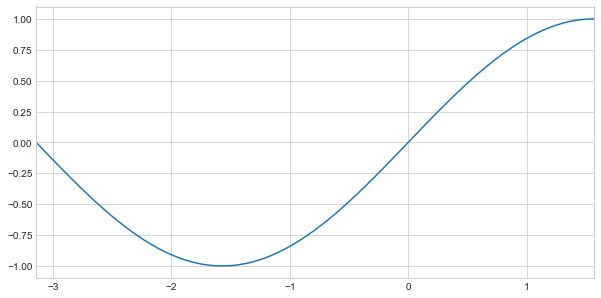

In [5]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

theta = np.linspace(-np.pi, np.pi, 100)
plt.plot(theta, np.sin(theta))

# Set the limit to the x values
ax.set_xlim([-np.pi, np.pi/2])

### 04. Labels and Legends

You can provide a label to your data series that will allow `matplotlib` to automatically build the legend for the plot. `x` and `y` axes may also be labeled using `set_xlabel()` and `set_ylabel()`. A title may also be provided to the subplot through the `set_title()` function.

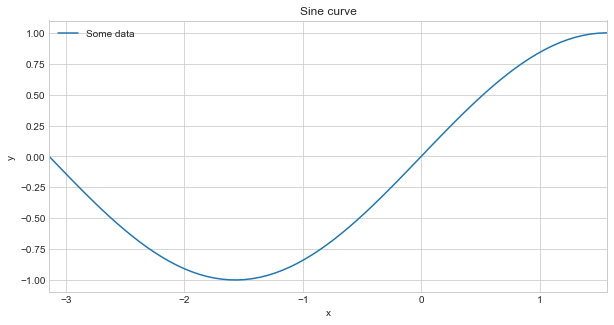

In [6]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

theta = np.linspace(-np.pi, np.pi, 100)
plt.plot(theta, np.sin(theta), label='Some data')

# Set the limit to the x values
ax.set_xlim([-np.pi, np.pi/2])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Sine curve")
ax.legend(); # This shows the legend (label)

### Customizing the plot design

In case you do not like the default styles provided, `matplotlib` also allows you to pass a custom **style sheet** or customize it directly using the `rcParams` object. [Reference](https://matplotlib.org/3.3.1/tutorials/introductory/customizing.html)

Below is a sample code snippet which changes the text color of plots.

```
textColor = '#3c3c3c'
highlightColor = '#3b738f'
plt.rcParams['text.color'] = textColor
plt.rcParams['axes.labelcolor'] = highlightColor
plt.rcParams['xtick.color'] = textColor
plt.rcParams['ytick.color'] = textColor
```

This changes the color of the general text and the ticks to <span style="color: #3c3c3c; font-weight: bold;">gray</span> and the labels of the axes to <span style="color: #3b738f; font-weight: bold;">teal</span>.

In [7]:
textColor = '#3c3c3c'
highlightColor = '#3b738f'
plt.rcParams['text.color'] = textColor
plt.rcParams['axes.labelcolor'] = highlightColor
plt.rcParams['xtick.color'] = textColor
plt.rcParams['ytick.color'] = textColor

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

## Exercise

Now, let's try working on a dataset and see how we can apply the data processing methods and visualization methods above to this dataset.

The Kaggle Titanic Dataset may be found here: https://www.kaggle.com/c/titanic/data

You would need to login to Kaggle to download the data.

In [8]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary

As taken from Kaggle: 

| Variable  | Definition                               | Key                                            |
| --------- | ---------------------------------------- | ---------------------------------------------- |
| survival  | Survival                                 | 0 = No, 1 = Yes                                |
| pclass    | Ticket class                             | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex       | Sex                                      |                                                |
| Age       | Age in years                             |                                                |
| sibsp     | # of siblings/spouses aboard the Titanic |                                                |
| parch     | # of parents/children aboard the Titanic |                                                |
| ticket    | Ticket number                            |                                                |
| fare      | Passenger fare                           |                                                |
| cabin     | Cabin number                             |                                                |
| embarked  | Port of Embarkation                      | C = Cherbourg, Q = Queenstown, S = Southampton |

### Let's begin exploring the data...

* How many rows and columns do we have? 
* What is the data type of each column? 
* What is the most common value? Mean? Standard deviation?
* Are there any missing values?
* How do you want to handle the missing values? Remove them? Replace with an arbitrary value?

In [9]:
# how many rows & columns?
titanic.shape

(891, 12)

In [10]:
# to get the data types of each column, you can also use df.info()
# this also provides you also the non-null counts per column
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# or just the data types
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Are there any missing values?
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# How do you want to handle the missing values? Remove them? Replace with an arbitrary value?
# This step is up to you and your analysis -- or more specifically, what you would need to analyze.

### Visualizations

In the next section, we'll try to visualize the data so that we can see it better. Since we have over 800 observations, using charts will help us "see" better.

Also, based on our knowledge of what happened in Titanic, let's see if the data and our pre-existing knowledge are aligned.

#### Verification Checklist

1. There were a lot of people who died from the Titanic. **How many died and how many survived?**
2. While evacuating the ship, they prioritized women and children, and also some elderly people. To confirm these, we ask the following:
    - What is the distrubution of the ages of the people onboard the Titanic?
    - Compare the distribution of the ages of the people who survived and those who died. Can you see a difference in the distribution?
    - How many men and women were aboard the Titanic?
    - How many of the men and how many of the women survived and died?
3. One thing depicted in the movies was the wealthy passengers were also prioritized during the evacuation of the ship. Can we also confirm this by looking at the number of people per passenger class that survived against those who died?

#### How many people survived? How many did not?

In [15]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

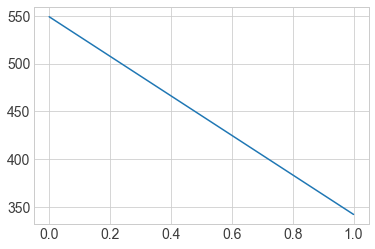

In [16]:
titanic['Survived'].value_counts().plot()

### Note on plotting directly with `pandas`

Since `pandas` integrates the functions of `matplotlib` too, there is a shortcut! You can directly plot a `DataFrame` or a `Series` by simply calling `plot()`. The default would be as shown above which is a **line plot**.

Calling the `df.plot()` function returns an `Axes` object which we can assign to a variable to set the title and the labels. _(Remember, it's important to always label your plots!!)_

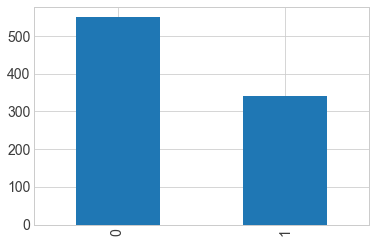

In [17]:
ax = titanic['Survived'].value_counts().plot(kind='bar')

### Default `pandas` plot changed to bar chart

To change the type of plot associated to `pandas`, we can specify the type of the chart using the `kind` argument.

But in its current state, the readers won't know what 0 and 1 represents and what the numbers on the y-axis represent. So we need to label our plot.

Text(0.5, 0, 'Status')

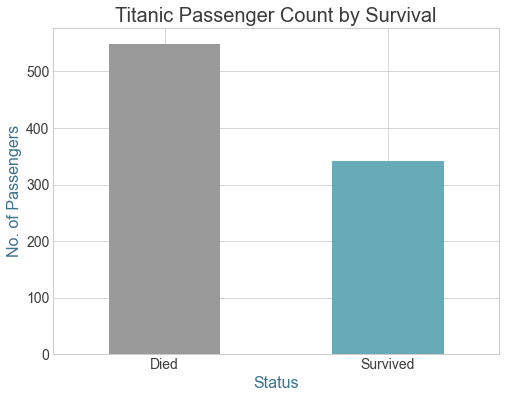

In [18]:
# here we specify the figure size as well to make it follow an aspect ratio we like
# the colors can also be set together with any other options for making the chart look "pretty"
ax = titanic['Survived'].value_counts().plot(figsize=(8, 6), kind='bar', color=['#999999', '#68abb8'], width=0.5)

ax.set_xticklabels(['Died', 'Survived'], rotation=0)
ax.set_title('Titanic Passenger Count by Survival')
ax.set_ylabel('No. of Passengers')
ax.set_xlabel('Status')

### Figure 1. Titanic Passenger Survival

Based on the data, we can see that more people died from the Titanic than those who survived. Out of the 800+ passengers, only a little bit over 300 passengers are alive.

#### What is the distribution of the age of the passengers?

29.69911764705882

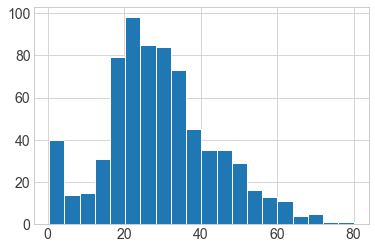

In [40]:
titanic['Age'].hist(bins=20, edgecolor='w')
titanic['Age'].mean()

### Histograms

To generate the distribution of a specific column in a `pandas` `DataFrame`, you can simply select the column with a numerical value and call `hist()`. You can adjust the bin size and colors according to your liking.

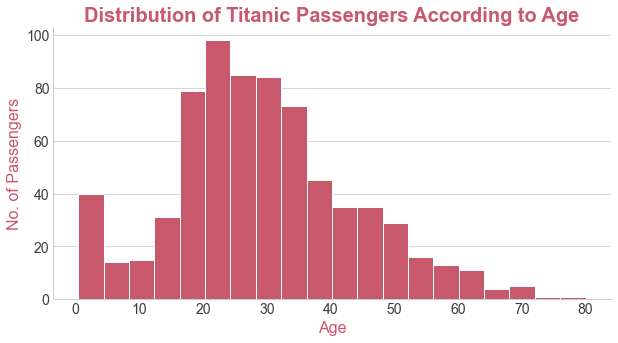

In [20]:
ax = titanic['Age'].hist(bins=20, edgecolor='w', color='#c8586c',  figsize=(10, 5))

# Here you can override the colors of set using rcParams by simply passing a value for the arguments.
ax.set_title('Distribution of Titanic Passengers According to Age',color='#c8586c', fontweight='bold')
ax.set_xlabel('Age', color='#c8586c')
ax.set_ylabel('No. of Passengers', color='#c8586c');

# To remove the spines of the chart manually, you can choose to set the visibility to False
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(False)

### Figure 2. Distribution of Titanic Passengers According to Age

Based on the descriptive stats and the check for null values above, there are passengers with no age. They are not included in this figure.

We can see that the peak is somewhere around 20 to mid-20s and therre are some really old people aboard the ship too.

There seems to a lot of children too, specially those below 10 years old.

<hr>

To better visualize the "average" age, let's try adding the `mean` and `median` of the age distribution using 

```ipython
ax.axvline(x=value)
```

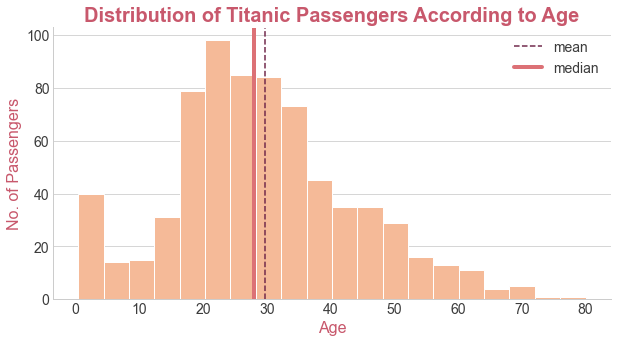

In [21]:
ax = titanic['Age'].hist(bins=20, edgecolor='w', color='#f5ba98',  figsize=(10, 5))

# Here you can override the colors of set using rcParams by simply passing a value for the arguments.
ax.set_title('Distribution of Titanic Passengers According to Age', color='#c8586c', fontweight='bold')
ax.set_xlabel('Age', color='#c8586c')
ax.set_ylabel('No. of Passengers', color='#c8586c');

# To remove the spines of the chart manually, you can choose to set the visibility to False
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(False)

ax.axvline(x=titanic['Age'].mean(), color='#70284a', linestyle='--', label='mean')
ax.axvline(x=titanic['Age'].median(), color='#dc7176', linewidth=4, label='median')
ax.legend(fontsize=14);


### Figure 3. Distribution of Titanic Passengers According to Age (with mean & median lines)

This is basically the same plot as Figure 2 but wuth some "threshold" or marker set for the mean and the median.

## Exploratory Analysis

The previous questions were concerned with just one variable. Let's try to visualize the data with more than just one variable.

#### What is the distribution of the age of those who survived and those who didn't? 

From the comparative visualization of the two distributions, can you spot a difference?

In [22]:
survived = titanic.loc[titanic['Survived'] == 1]
died = titanic.loc[titanic['Survived'] == 0]

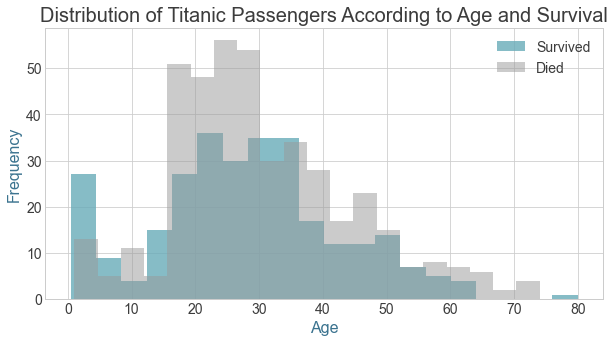

In [23]:
axes_object = survived['Age'].hist(bins=20, alpha=0.8, color='#68abb8', label='Survived', figsize=(10, 5))

# To make overlapping plots, you can simply reuse the same `Axes` object.
# We can also adjust the opacity or the alpha channel by specifying a value less than 1.
died['Age'].hist(ax=axes_object, bins=20, alpha=0.5, color='#999999', label='Died')

axes_object.set_title('Distribution of Titanic Passengers According to Age and Survival', fontsize=20)
axes_object.set_xlabel('Age', fontsize=16)
axes_object.set_ylabel('Frequency', fontsize=16)
axes_object.legend(fontsize=14);

### Figure 4. Distribution of Titanic Passenger Age (according to survival status)

Overlapping distributions of the passenger age according to their survival status.

Overlapping the histograms doesn't really give us a good view.

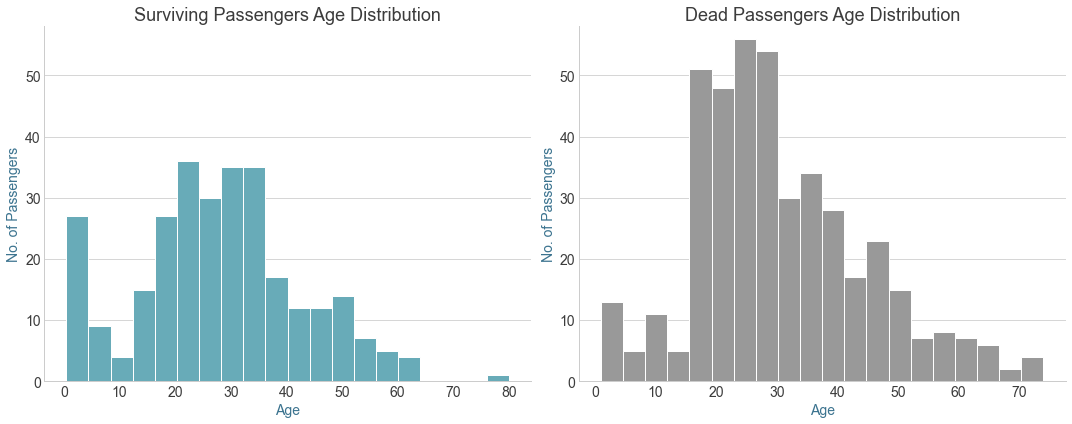

In [24]:
# Here we create a figure to hold 2 side by side (juxtaposed) plots
fig = plt.figure(figsize=(15, 6))

# adding a subplot manually, we need to specify the row, columns, index of plot
ax = fig.add_subplot(1,2,1)

survived['Age'].hist(ax=ax, bins=20, edgecolor='w', color='#68abb8')
ax.set_title('Surviving Passengers Age Distribution', fontsize=18)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('No. of Passengers', fontsize=14)
ax.set_ylim([0, 58]) # setting the same limit for both plots
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(False)

# adding a subplot manually, we need to specify the row, columns, index of plot
ax2 = fig.add_subplot(1,2,2)

died['Age'].hist(ax=ax2, bins=20, edgecolor='w', color='#999999')
ax2.set_title('Dead Passengers Age Distribution', fontsize=18)
ax2.set_xlabel('Age', fontsize=14)
ax2.set_ylabel('No. of Passengers', fontsize=14)
ax2.set_ylim([0, 58]) # setting the same limit for both plots
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.xaxis.grid(False)

plt.tight_layout() # this adjusts and makes the figures fit in the frame "tightly"

### Figure 5. Side-by-side comparison of the distribution of passenger age (survived vs died)

By putting the histogram side by side, we can now see the distribution of the passengers that survived and compare that with the passengers that died.

**Based on your observations, what can you notice or deduce just by looking at the distributions?**

In [25]:
# What about the gender of the passengers? How many survived per gender?

bygender = titanic.groupby('Survived')['Sex'].value_counts().unstack()
bygender

Sex,female,male
Survived,,
0,81,468
1,233,109


In [26]:
male = bygender['male']
female = bygender['female']

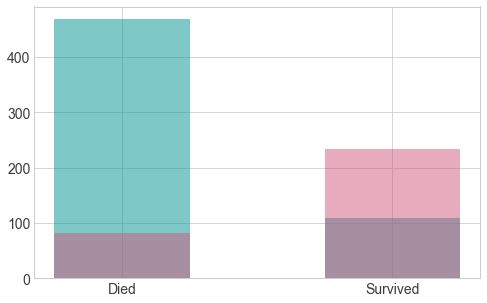

In [27]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

ax.bar(male.index, male, color='#009392', alpha=0.5, width=0.5)
ax.bar(female.index, female, color='#d0587e', alpha=0.5, width=0.5)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Died', 'Survived']);

### 2 keys, 1 quantitative value — we can use a stacked bar chart!

But in this case, we've plotted the bars manually and they're not stacked yet. Which is why we've used `alpha` to adjust the opacity so we can see through each element first.

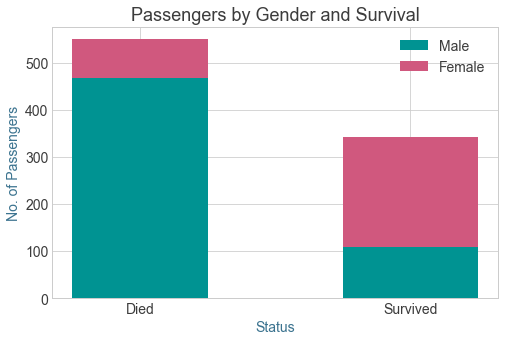

In [28]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

ax.bar(male.index, male, color='#009392', width=0.5, label='Male')

# To stack them on top of one another, we can use the argument bottom
ax.bar(female.index, female, bottom=male, color='#d0587e', width=0.5, label='Female')

ax.set_xticks([0, 1])
ax.set_xticklabels(['Died', 'Survived'], fontsize=14)
ax.set_title('Passengers by Gender and Survival', fontsize=18)
ax.set_xlabel('Status', fontsize=14)
ax.set_ylabel('No. of Passengers', fontsize=14)
ax.legend(fontsize=14);

### Figure 6. Stacked Bar Chart of Passengers by Gender & Status

This now shows the part-to-whole relationship of the dead and surviving passengers according to gender.

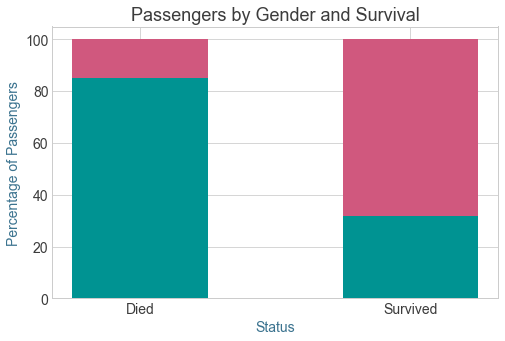

In [29]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

ax.bar(male.index, male/(male+female)*100, color='#009392', label='Male', width=0.5)
ax.bar(female.index, female/(male+female)*100, bottom=male/(male+female)*100, color='#d0587e', label='Female', width=0.5)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Died', 'Survived'])
ax.set_title('Passengers by Gender and Survival', fontsize=18)
ax.set_xlabel('Status', fontsize=14)
ax.set_ylabel('Percentage of Passengers', fontsize=14);

### Figure 7. Normalized Stacked Bar Chart of Passengers by Gender & Status

Here, the values arer normalized over the total number of passengers multiplied by 100 to get the percentage of passengers per gender per status.

<hr>

An alternative way to plot the bar charts is directly through `pandas`.

We'll use the Survival & Passenger Class as the keys for this example.

In [30]:
byclass = titanic.groupby('Survived')['Pclass'].value_counts().unstack()
byclass

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


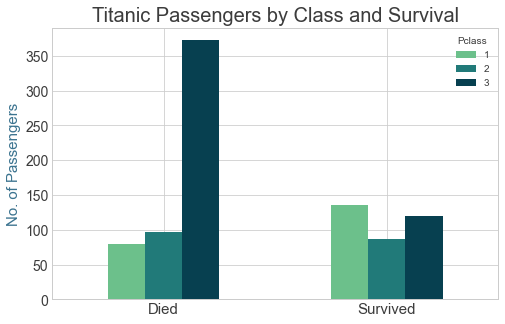

In [31]:
ax = byclass.plot(kind='bar', figsize=(8, 5), color=['#6cc08b','#217a79','#074050'])

ax.set_title('Titanic Passengers by Class and Survival', fontsize=20)
ax.set_xticklabels(['Died', 'Survived'], rotation=0, fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('No. of Passengers', fontsize=15);

### Grouped Bar Chart

By default, if we have 2 keys and 1 value like a pivot table and we pass `kind='bar'` for the plot type, it creates a grouped bar chart as seen above.

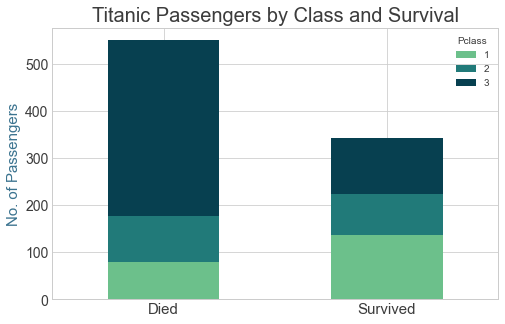

In [32]:
ax = byclass.plot(kind='bar', stacked=True, figsize=(8, 5), color=['#6cc08b','#217a79','#074050'])

ax.set_title('Titanic Passengers by Class and Survival', fontsize=20)
ax.set_xticklabels(['Died', 'Survived'], rotation=0, fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('No. of Passengers', fontsize=15);

### Stacked Bar Chart
To turn it into a stacked bar chart, we simply pass the argument `stacked=True`.

In [33]:
# df.T transposes the dataframe (if you recall your matrix functions... ^^,)

byclass.T 

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [34]:
byclass.T / byclass.sum(axis=1)

Survived,0,1
Pclass,,
1,0.145719,0.397661
2,0.176685,0.254386
3,0.677596,0.347953


Here we calculate the percentages of each category...

In [35]:
(byclass.T / byclass.sum(axis=1)).sum()

Survived
0    1.0
1    1.0
dtype: float64

And as a sanity check, we see if the total is 1.0 (100%)

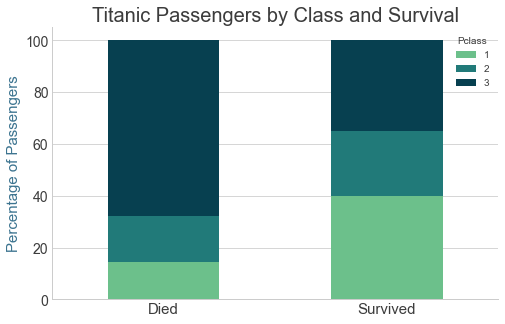

In [36]:
data = byclass.T / byclass.sum(axis=1) * 100
ax = data.T.plot(kind='bar', stacked=True, figsize=(8, 5), color=['#6cc08b','#217a79','#074050'])

ax.set_title('Titanic Passengers by Class and Survival', fontsize=20)
ax.set_xticklabels(['Died', 'Survived'], rotation=0, fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('Percentage of Passengers', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(False);

Lastly, let's try making a scatter plot... But in this dataset, it's not really logical to comparer the age and the fare.

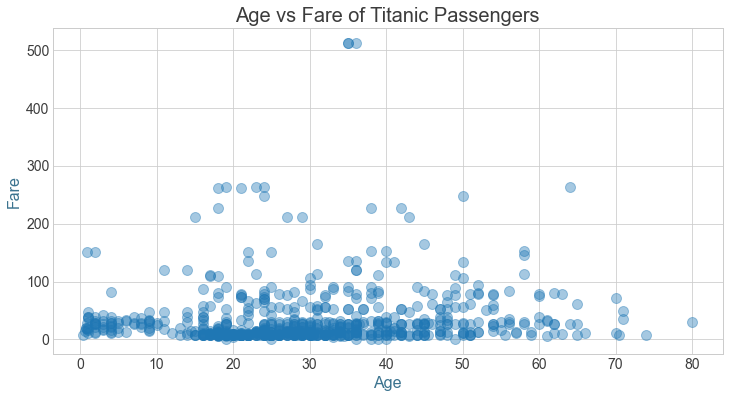

In [37]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(111)

# by setting the format of the plot to 'o' or '.', it automatically changes the plot from a line to a scatter plot
ax.plot(titanic['Age'], titanic['Fare'], 'o', ms=10, alpha=0.4)
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Fare', fontsize=16)
ax.set_title('Age vs Fare of Titanic Passengers', fontsize=20);

### Figure 8. Scatter plot of Age vs Fare of the Titanic Passengers

This shows the relationship of the age and the fare of the Titanic passengers. Therre's a few passengers that paid over 500 dollars to board the ship! This may be correct (which makes it a very special outlier) or it could be an anomaly...?

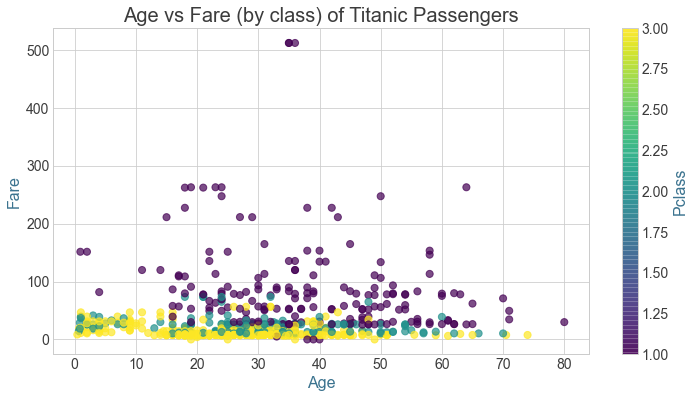

In [38]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(111)

titanic.plot.scatter(ax=ax, x='Age', y='Fare', c='Pclass', cmap='viridis', s=50, alpha=0.7)
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Fare', fontsize=16)
ax.set_title('Age vs Fare (by class) of Titanic Passengers', fontsize=20);

### Figure 9. Scatter plot of Age vs Fare of Titanic Passengers (by Passenger Class)

In this scatter plot, each point is colored by the passenger class and from the visuals, we can see that Class 3 passengers indeed pay less and Class 1 passengers pay more... But there are still some that pay more or less the same amount as the Class 3 passengers? 